<a href="https://colab.research.google.com/github/Devheun/Data-Analysis/blob/main/Making_Graph(Lec8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>그래프 만들기</h2>

> seaborn 패키지를 이용하여 다양한 그래프 만들기



<h4>산점도 - 변수 간 관계 표현하기</h4>

---

산점도 : 데이터를 x축과 y축에 점으로 표현한 그래프
ex) 나이와 소득처럼 연속값으로 된 두 변수의 관계 표현

<산점도 만들기>

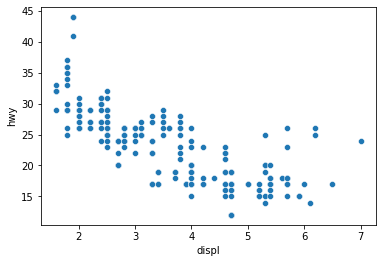

In [ ]:
import pandas as pd
import seaborn as sns
mpg=pd.read_csv('mpg.csv')
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(10.0, 30.0), (3.0, 6.0)]

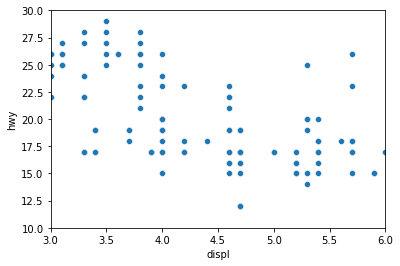

In [ ]:
# 축 범위 설정하기
sns.scatterplot(data=mpg,x='displ',y='hwy')\
   .set(xlim=(3,6),ylim=(10,30)) # sns.set()의 xlim과 ylim을 이용하여 설정

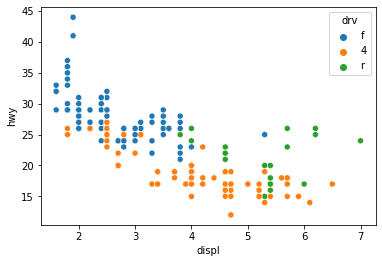

In [ ]:
# 종류별로 표식 색깔 바꾸기
sns.scatterplot(data=mpg,x='displ',y='hwy',hue='drv') # hue를 이용하여 표식 색깔 종류별로

**Practice** : mpg 데이터와 midwest 데이터를 이용해 분석문제 해결

1. mpg데이터의 cty와 hwy간에 관계를 알아보기 위해 x축은 cty, y축은 hwy로 된 산점도 만들기

2. 전체 인구와 아시아인 인구 간에 관계 알아보기 위해 x축은 poptotal(전체 인구), y축은 popasian(아시아인 인구)로 된 산점도 만들기, 전체 인구는 50만명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정

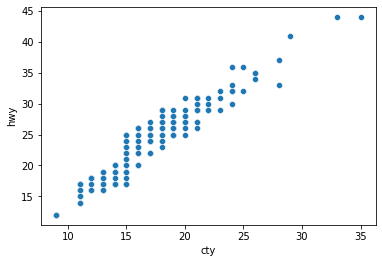

In [ ]:
# Practice 1
mpg=pd.read_csv('mpg.csv')
sns.scatterplot(data=mpg,x='cty',y='hwy')

[(0.0, 10000.0), (0.0, 500000.0)]

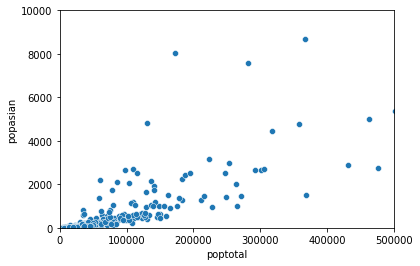

In [ ]:
# Practice 2
midwest=pd.read_csv('midwest.csv')
sns.scatterplot(data=midwest,x='poptotal',y='popasian')\
   .set(xlim=(0,500000),ylim=(0,10000))

<h2>막대 그래프 - 집단 간 차이 표현하기</h2>

---

막대 그래프 : 데이터의 크기를 막대의 길이로 표현한 그래프
ex) 성별 소득 차이처럼 집단 간 차이를 표현할 때 주로 사용

<평균 막대 그래프 만들기>

In [ ]:
df_mpg=mpg.groupby('drv',as_index=False)\
          .agg(mean_hwy=('hwy','mean'))
df_mpg # seaborn으로 그래프를 만들려면 값이 변수에 담겨 있어야함 (인덱스로 바꾸지 않고)

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


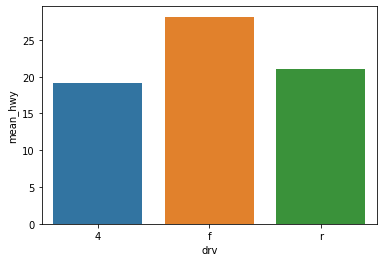

In [ ]:
sns.barplot(data=df_mpg,x='drv',y='mean_hwy') # drv별 hwy평균을 나타내는 막대 그래프

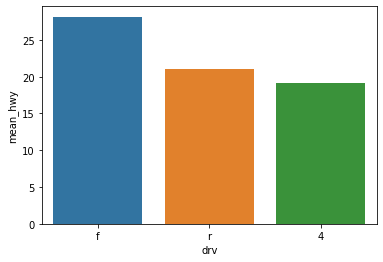

In [ ]:
df_mpg=df_mpg.sort_values('mean_hwy',ascending=False) # 크기 순으로 정렬하기
sns.barplot(data=df_mpg,x='drv',y='mean_hwy') 

<빈도 막대 그래프 만들기>

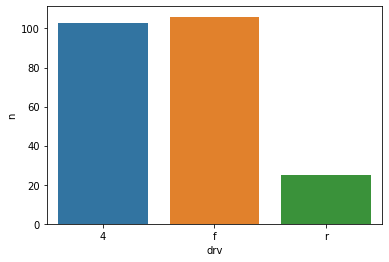

In [ ]:
df_mpg=mpg.groupby('drv',as_index=False)\
          .agg(n=('drv','count'))
sns.barplot(data=df_mpg,x='drv',y='n')

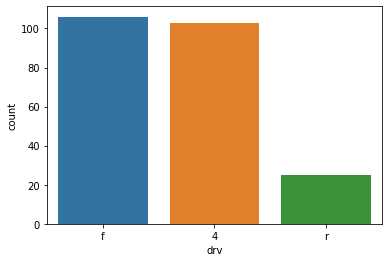

In [ ]:
# 위의 코드와 동일하게 sns.countplot()으로 만들 수 있다.
sns.countplot(data=mpg,x='drv')

두 막대 그래프의 x축 순서가 다르다. **Why?**
-> groupby()를 이용해 데이터 프레임을 요약하면 값의 순서가 알파벳으로 바뀌기 때문에

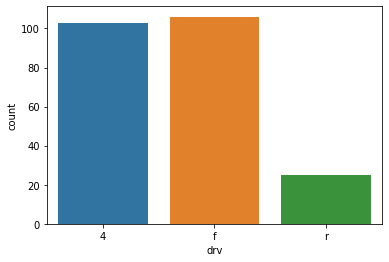

In [ ]:
sns.countplot(data=mpg,x='drv',order=['4','f','r']) # order 특성을 이용해 원하는 순서로 정렬 가능

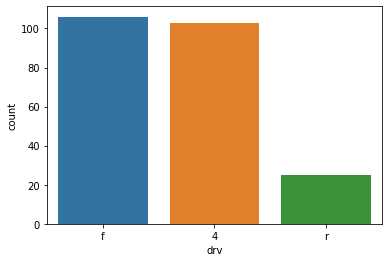

In [ ]:
sns.countplot(data=mpg,x='drv',order=mpg['drv'].value_counts().index) # df.value_counts().index 는 빈도가 높은 순으로 변수의 값을 출력하는 기능

**Practice** : mpg 데이터를 이용해 분석문제 해결

1. 'suv'차종을 대상으로 cty(도시 연비)평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기 (막대는 연비가 높은 순으로 정렬)

2. sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프 만들기 (막대는 빈도가 높은 순으로 정렬)

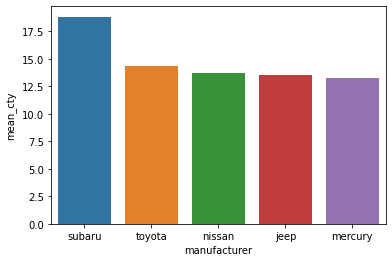

In [ ]:
# Practice 1
mpg=pd.read_csv('mpg.csv')
df_mpg=mpg.query('category=="suv"')\
          .groupby('manufacturer',as_index=False)\
          .agg(mean_cty=('cty','mean'))\
          .sort_values('mean_cty',ascending=False)\
          .head()

sns.barplot(data=df_mpg,x='manufacturer',y='mean_cty')

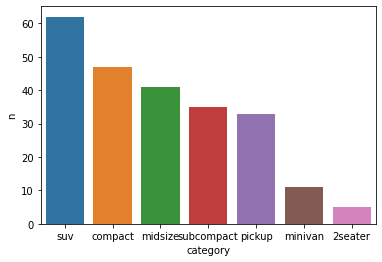

In [ ]:
# Practice 2
df_mpg=mpg.groupby('category',as_index=False)\
          .agg(n=('category','count'))\
          .sort_values('n',ascending=False)
sns.barplot(data=df_mpg,x='category',y='n')

<h4>선 그래프 - 시간에 따라 달라지는 데이터 표현하기</h4>

---

선 그래프 : 데이터를 선으로 표현한 그래프
시간에 따라 달라지는 데이터를 표현할 때 자주 사용 ex) 환율, 주가 지수 등

일정 시간 간격을 두고 나열된 데이터 : 시계열 데이터
시계열 데이터를 선으로 표현한 그래프 : 시계열 그래프

<시계열 그래프 만들기>

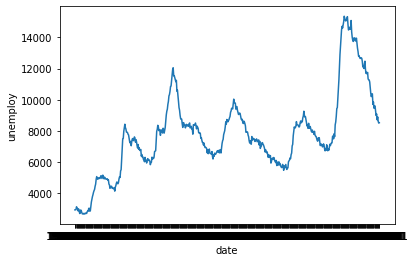

In [4]:
import pandas as pd
import seaborn as sns

economics=pd.read_csv('economics.csv')
sns.lineplot(data=economics,x='date',y='unemploy') # x축에 굵은 선 표시되는 이유 : date 변수의 값들이 겹쳐서

x축에 연도를 표시해보자.

In [6]:
# 변수 타입을 날짜 시간 타입(datetime64)로 바꿔야 함.
economics['date2']=pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [7]:
# 날짜 시간 타입은 df.dt를 이용해 연,월,일 추출가능
economics['date2'].dt.year,economics['date2'].dt.month,economics['date2'].dt.day

(0      1967
 1      1967
 2      1967
 3      1967
 4      1967
        ... 
 569    2014
 570    2015
 571    2015
 572    2015
 573    2015
 Name: date2, Length: 574, dtype: int64, 0       7
 1       8
 2       9
 3      10
 4      11
        ..
 569    12
 570     1
 571     2
 572     3
 573     4
 Name: date2, Length: 574, dtype: int64, 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 569    1
 570    1
 571    1
 572    1
 573    1
 Name: date2, Length: 574, dtype: int64)

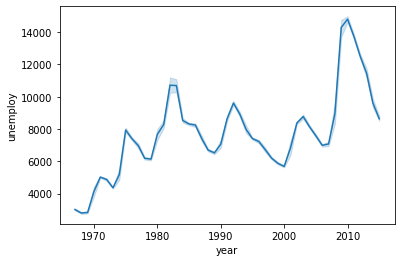

In [8]:
# 연도 변수 추가
economics['year']=economics['date2'].dt.year
sns.lineplot(data=economics,x='year',y='unemploy') # 선의 위아래 표시된 면적은 신뢰구간. 표시하지 않으려면 ci=None 입력

Practice : economics 데이터를 이용해 분석문제 해결

1. 연도별 개인 저축률(psavert)의 변화를 나타낸 시계열 그래프 만들기
2. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프 만들기

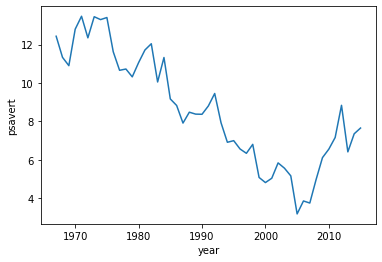

In [12]:
# Problem 1
economics=pd.read_csv('economics.csv')
economics['date2']=pd.to_datetime(economics['date'])
economics['year']=economics['date2'].dt.year

sns.lineplot(data=economics,x='year',y='psavert',ci=None)

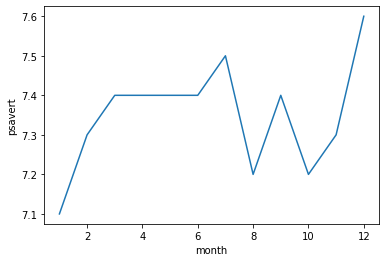

In [19]:
# Problem 2
economics['month']=economics['date2'].dt.month
eco_2014=economics.query('year==2014')
sns.lineplot(data=eco_2014,x='month',y='psavert',ci=None)

<h4>상자 그림 - 집단 간 분포 차이 표현하기</h4>


---
상자 그림 : 데이터의 분포 또는 퍼져 있는 형태를 직사각형 상자 모양으로 표현한 그래프


<상자 그림 만들기>

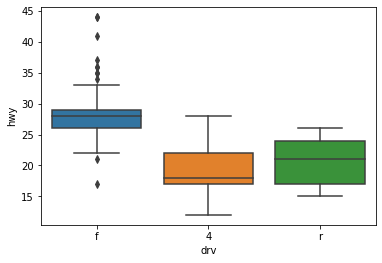

In [20]:
mpg=pd.read_csv('mpg.csv')
sns.boxplot(data=mpg,x='drv',y='hwy')

**Practice **: mpg 데이터를 이용해 분석문제 해결
1. category가 'compact', 'subcompact', 'suv'인 자동차의 cty가 어떻게 다른지 비교하기 위해 세 차종의 cty를 나타낸 상자 그림 만들기

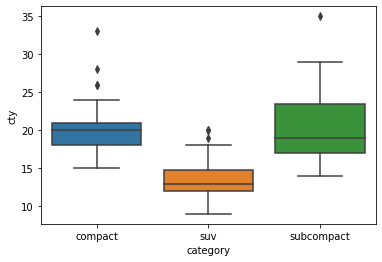

In [22]:
mpg=pd.read_csv('mpg.csv')
mpg2=mpg.query('category in ["compact","subcompact","suv"]')
sns.boxplot(data=mpg2,x='category',y='cty')